In [175]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [174]:
combi1= pd.read_csv('train_E6oV3lV.csv')
#combi2= pd.read_csv('testing-jeep data.csv')
combi2=pd.read_excel('testing-jeep data.xlsx')
combi6=pd.read_excel('testing-chrysler data.xlsx')

In [176]:
combi3=pd.read_csv('training.1600000.processed.noemoticon-1.csv',  sep=',',  names=["label",'org_id', "Date", "Query", "special", "tweet"],encoding='latin-1')

#pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1')
#combi3 = pd.read_excel ('training.1600000.processed.noemoticon.xlsx')

In [177]:
combi3.head()

,label,org_id,Date,Query,special,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [178]:
combi3.insert(0, 'id', range(1, 1 + len(combi3)))

In [179]:
combi3.head()

,id,label,org_id,Date,Query,special,tweet
0,1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,5,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [180]:
combi5=[]
combi5=combi3[['id','label','tweet']]

In [181]:
combineg=[]
combineutral=[]
combipos=[]
combineg1=[]
combineg = combi5[combi5['label'] == 0] 
#if(combi5['label']=='4'):
 #   combineg=combi5[['id','label','tweet']]
combineutral = combi5[combi5['label'] == 2]
combipos = combi5[combi5['label'] == 4]
combineg1=combineg[combineg['id'] < 50001] 
combipos1=combipos[(combipos['id'] > 800000) & (combipos['id'] < 850001)] 
combipos2=combipos1
combipos2['label']=1

C:\Users\kirsam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [182]:
combinew = combineg1.append(combipos2, ignore_index=True)
combinew['id']=range(1, 1 + len(combinew))
combinew

,id,label,tweet
0,1,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,2,0,is upset that he can't update his Facebook by ...
2,3,0,@Kenichan I dived many times for the ball. Man...
3,4,0,my whole body feels itchy and like its on fire
4,5,0,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
99995,99996,1,Now need 8 followers to compleate 1000 Follow...
99996,99997,1,I knew I had to explain something to my friend...
99997,99998,1,done tweeting..... til tomorrow..
99998,99999,1,@cmozilo Act II set is pretty breath-taking -L...


In [172]:
combinew.to_csv('training_data.csv', index=False)

In [236]:
train=combinew
test=combi6

In [244]:
combi=[]
combi = combinew.append(combi6, ignore_index=True)

In [245]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [246]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [247]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [248]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [249]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",http twitpic Awww that bummer shoulda David Ca...
1,2,0.0,is upset that he can't update his Facebook by ...,upset that update Facebook texting might resul...
2,3,0.0,@Kenichan I dived many times for the ball. Man...,dived many times ball Managed save rest bounds
3,4,0.0,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,5,0.0,"@nationwideclass no, it's not behaving at all....",behaving here because over there


In [250]:
combi.tail()

,id,label,tweet,tidy_tweet
100763,764,NaN,Check out Motor City Classics Die-cast 1:18 Pr...,Check Motor City Classics cast Preowned Chrysl...
100764,765,NaN,"Due to time and inclement weather, my Chrysler...",time inclement weather Chrysler building spire...
100765,766,NaN,"En Route Investors Investment Store $1, $20, $...",Route Investors Investment Store Chrysler SHAR...
100766,767,NaN,#alfaromeo #audi #bmw #chevrolet #chrysler #ci...,#alfaromeo #audi #bmw #chevrolet #chrysler #ci...
100767,768,NaN,#alfaromeo #audi #bmw #chevrolet #chrysler #ci...,#alfaromeo #audi #bmw #chevrolet #chrysler #ci...


In [251]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [http, twitpic, Awww, that, bummer, shoulda, D...
1    [upset, that, update, Facebook, texting, might...
2    [dived, many, times, ball, Managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4               [behaving, here, because, over, there]
Name: tidy_tweet, dtype: object

In [252]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [http, twitpic, awww, that, bummer, shoulda, d...
1    [upset, that, updat, facebook, text, might, re...
2    [dive, mani, time, ball, manag, save, rest, bo...
3               [whole, bodi, feel, itchi, like, fire]
4                   [behav, here, becaus, over, there]
Name: tidy_tweet, dtype: object

In [253]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

In [206]:
combicheck=combi[(combi['label'] != 1) & (combi['label'] != 0)] 
combicheck

,id,label,tweet,tidy_tweet
100000,31963,NaN,lmao i was gone pull up in the jeep,lmao gone pull jeep
100001,31964,NaN,"@md_geist1 make sure you the jeep in ""Tow-Gear...",make sure jeep gear when with emili
100002,31965,NaN,Jeep Renegade - Crash &amp; Safety Tests â€“ 2...,jeep renegad crash safeti test krinter
100003,31966,NaN,Do you know the family? I donâ€™t think so. Sh...,know famili think wasn even drive back seat wh...
100004,31967,NaN,That jeep,that jeep
...,...,...,...,...
102343,34306,NaN,Jeep runs down two women during protest in Vis...,jeep run down women dure protest visalia
102344,34307,NaN,Doing great! Enjoyed date night in the Jeep by...,do great enjoy date night jeep go local favori...
102345,34308,NaN,My neighbors set up their umbrella table in fr...,neighbor their umbrella tabl front their garag...
102346,34309,NaN,"Nevermind, I want nothing but a SRT idagf if i...",nevermind want noth idagf jeep afford trackhaw...


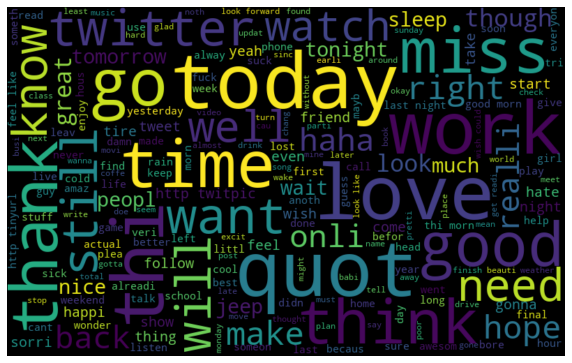

In [207]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

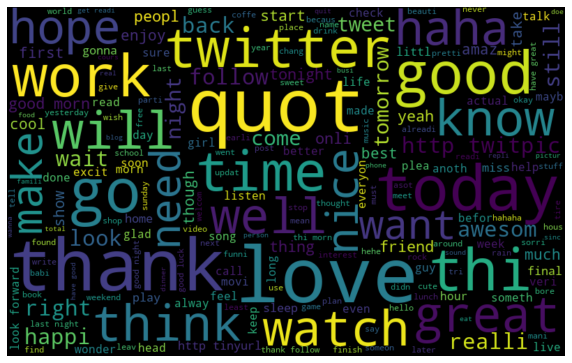

In [208]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

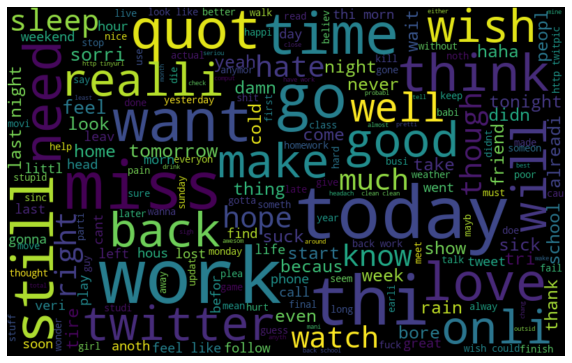

In [209]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [210]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [211]:
# extracting hashtags from positive tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

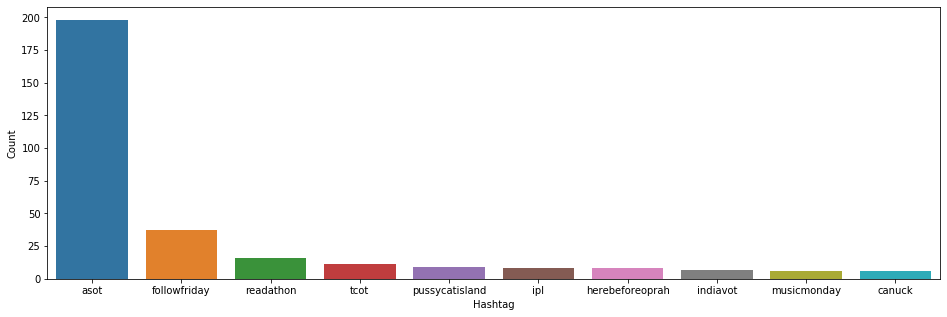

In [212]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

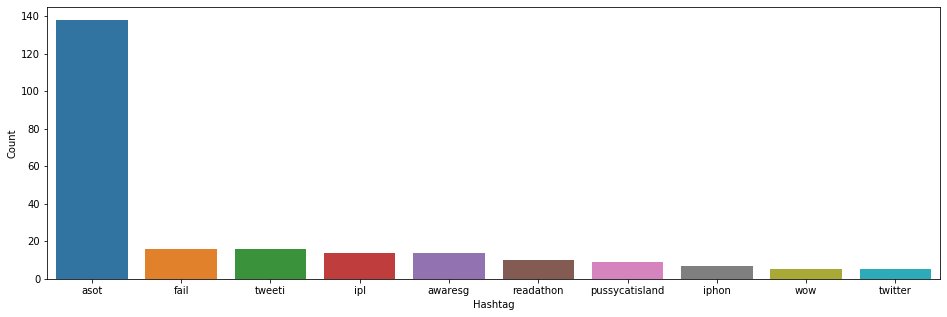

In [213]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [254]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [255]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:100000,:]
test_bow = bow[100000:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

C:\Users\kirsam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7438119482207658

In [257]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label','tweet']]
#submission.to_csv('sub_lreg_bow_new_traindata_jeep.csv', index=False) # writing data to a CSV file

In [258]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

# remove twitter handles (@user)
submission['tidy_tweet'] = np.vectorize(remove_pattern)(submission['tweet'], "@[\w]*")

# remove special characters, numbers, punctuations
submission['tidy_tweet'] = submission['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

submission['tidy_tweet'] = submission['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

tokenized_tweet = submission['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

submission['tidy_tweet'] = tokenized_tweet



C:\Users\kirsam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\kirsam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\kirsam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


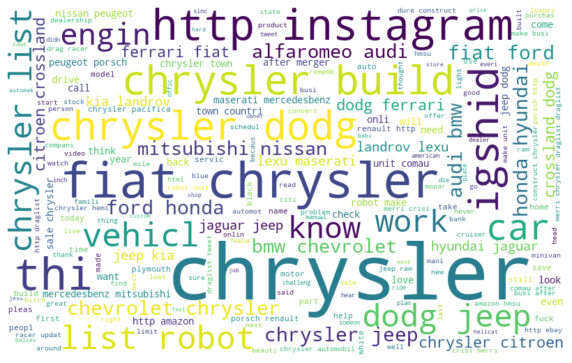

In [259]:
all_words = ' '.join([text for text in submission['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,background_color='white', random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

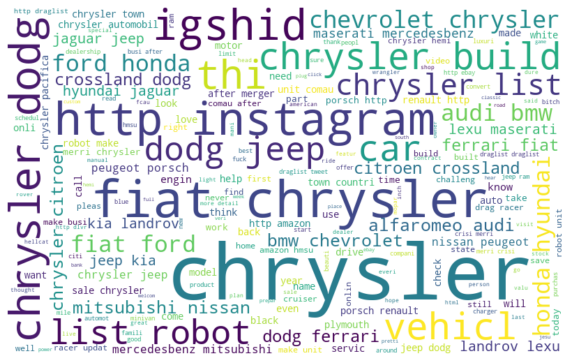

In [260]:
normal_words =' '.join([text for text in submission['tidy_tweet'][submission['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, background_color='white',random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

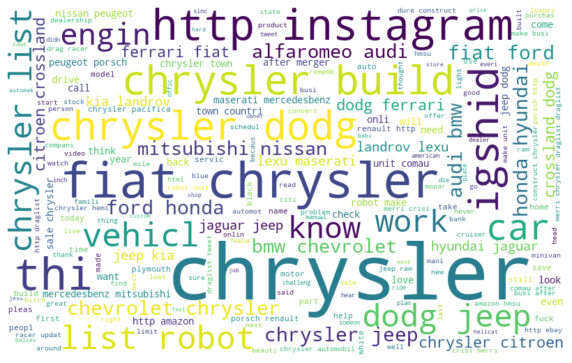

In [261]:
negative_words = ' '.join([text for text in submission['tidy_tweet'][combi['label'] == 0]])
wordcloud = WordCloud(width=800, height=500,background_color='white',
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [141]:
#Building model using TF-IDF features
train_tfidf = tfidf[:100000,:]
test_tfidf = tfidf[100000:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)


f1_score(yvalid, prediction_int)

0.7467486532078141

In [44]:
test_pred1 = lreg.predict_proba(xvalid_tfidf)
test_pred_int1 = test_pred1[:,1] >= 0.3
test_pred_int1 = test_pred_int1.astype(np.int)
test['label'] = test_pred_int1
submission1 = test[['id','label']]
submission1.to_csv('sub_lreg_bow1.csv', index=False) # writing data to a CSV file

ValueError: Length of values does not match length of index